# <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
## Template RAMP kit

<i> Balázs Kégl (LAL/CNRS)</i>

## Introduction

We will play with some toy data which have been generated from `make_classification` using `scikit-learn`

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Fetch the data and load it in pandas

In [2]:
local_filename = 'public_data/public_train.csv'

# Open file and print the first 3 lines
with open(local_filename) as fid:
    for line in fid.readlines()[:3]:
        print(line)

a,b,c,d,e,class

-0.9108705573298863,2.1719283049988936,1.7164167631946654,-1.3760610584514885,-0.5820334473337372,1

-1.2319398489743625,-2.061718669286088,-0.6568870651542642,1.3802644185225939,-0.17601396338305053,0



In [3]:
data = pd.read_csv(local_filename)

In [4]:
data.head()

,a,b,c,d,e,class
0,-0.910871,2.171928,1.716417,-1.376061,-0.582033,1
1,-1.231940,-2.061719,-0.656887,1.380264,-0.176014,0
2,-1.639208,0.773932,0.425029,-1.628487,0.670923,1
3,-0.525063,0.687074,2.169666,-2.814226,-1.305821,2
4,0.540317,2.520622,-1.983280,2.127394,2.520011,1


In [5]:
data.shape

(10000, 6)

In [6]:
data.describe()

,a,b,c,d,e,class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.008690,-0.664791,-0.223289,0.006566,0.010393,0.999600
std,1.631381,1.454659,1.459323,1.569686,1.647271,0.816986
min,-6.167098,-7.023348,-5.203644,-6.769089,-5.689616,0.000000
25%,-1.135976,-1.660860,-1.232861,-1.004139,-1.145576,0.000000
50%,0.003438,-0.740861,-0.189534,0.343172,0.017999,1.000000
75%,1.144984,0.255105,0.788341,1.145504,1.184801,2.000000
max,6.330686,5.286852,4.731890,5.013172,6.028876,2.000000


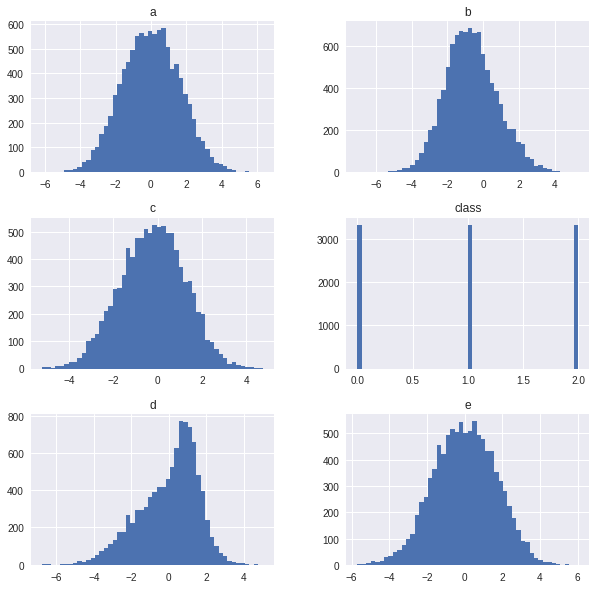

In [7]:
data.hist(figsize=(10, 10), bins=50, layout=(3, 2));

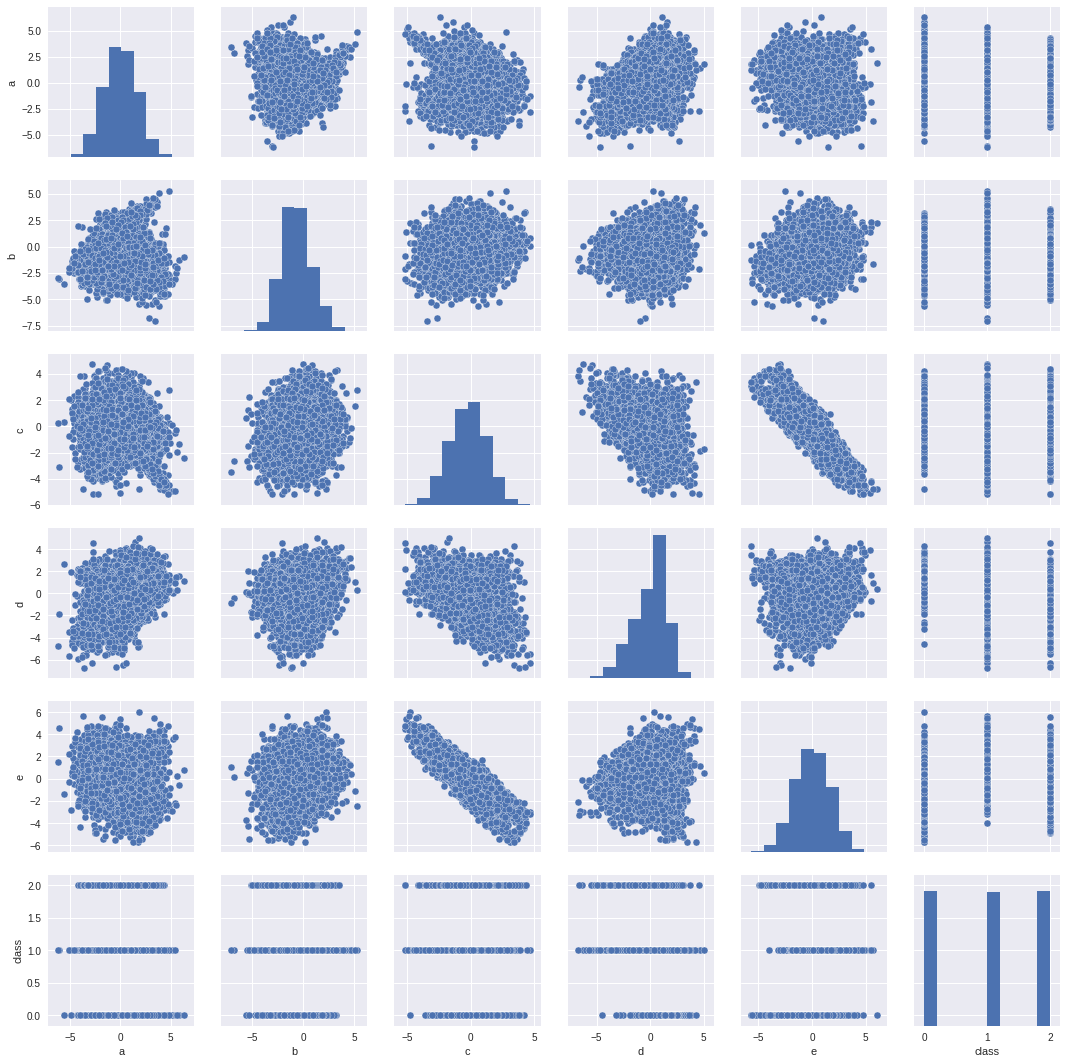

In [8]:
sns.pairplot(data);

## Building predictive models

In [9]:
features = data.drop('class', axis=1)
X = features.values
y = data['class'].values

The initial classifier in your sandbox.

In [10]:
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyClassifier


class Classifier(BaseEstimator):
    """Classifier used during the submission.

    This classifier will be trained and then use to solve our problem.

    Parameters
    ----------
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by ``np.random``.

    Attributes
    ----------
    clf_ : object,
        The classifier used internally.

    """

    def __init__(self, random_state=None):
        self.random_state = random_state

    def fit(self, X, y):
        """Train our classifier using training data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            The training data.

        y : ndarray, shape (n_samples, )
            The target associated with the data.

        Returns
        -------
        self
        """
        # we will use a dummy classifier
        self.clf_ = DummyClassifier(random_state=self.random_state)
        self.clf_.fit(X, y)

        return self

    def predict(self, X):
        """Predict target providing test data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)

        Returns
        -------
        pred : ndarray, shape (n_samples, )
            Prediction labels.

        """
        return self.clf_.predict(X)

    def predict_proba(self, X):
        """Predict target providing test data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)

        Returns
        -------
        pred : ndarray, shape (n_samples, n_classes)
            Prediction probabilities.

        """
        return self.clf_.predict_proba(X)

The following code mimics the way your submission is tested.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

skf = StratifiedShuffleSplit(n_splits=2, test_size=0.5, random_state=61)

for valid_train_is, valid_test_is in skf.split(X, y):
    X_valid_train = X[valid_train_is]
    y_valid_train = y[valid_train_is]
    X_valid_test = X[valid_test_is]
    y_valid_test = y[valid_test_is]
    clf = Classifier()
    clf.fit(X_valid_train, y_valid_train)
    y_valid_pred = clf.predict(X_valid_test)
    y_valid_proba = clf.predict_proba(X_valid_test)
    print('accuracy = ', accuracy_score(y_valid_pred, y_valid_test))

accuracy =  0.332
accuracy =  0.3326


## Unit testing

In [12]:
%run test_submission.py

Testing Template multiclass
Reading file ...
Training model ...
CV fold 1
	acc = 0.34
	err = 0.66
	nll = 22.9
	f1_70 = 0.0
----------------------------
acc = -3.83 ± 4.168
err = -2.67 ± 3.332
nll = 9.45 ± 13.45
f1_70 = -1.0 ± 1.0


Additionally, you can run at anytime this test using the following command:n be run when you submit it.

```python
python -m test_submission
```